In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### <center>Problema do Aprendizado utilizando Perceptron<center>
### <align=right>Tibor Zequini Boglár</align>

Dado um problema de aprendizado, nosso objetivo é encontrar uma função $g:X\rightarrow Y$ que se aproxime da função $f:X\rightarrow Y$, onde $f$ se trata da função exata de nosso problema. 

O problema estará resolvido se $g \approx f$.

Tomamos $X$ como o conjunto dos Inputs e $Y$ é o conjunto dos Outputs.

Para chegarmos na função $g$ usamos uma função linear chamada hipótese $h$ que nos auxilia no aprendizado, onde $h \in \mathbb{H}$, tal que $\mathbb{H}$ é o conjunto das funções hipóteses.

Supondo o problema de aprovação de crédito, onde

$$\vec{x}=(x_1, x_2, ..., x_d) \qquad \text{x$_i$ é um atributo do cliente}$$

$$y \in \{1,-1\} \qquad \text{se y=1} \implies \text{aprovado, se y= -1} \implies \text{reprovado}  $$

Queremos saber se aprovamos seu crédito, para isso tomamos

$$\text{Aprovado se } \sum_{i=1}^{d}w_ix_i \geq \text{threshold}$$ 

$$\text{Reprovado se } \sum_{i=1}^{d}w_ix_i < \text{threshold}$$ 


Tomando $w_0 = $ threshold e chamando $x_0 = 1$, podemos escrever

$$h(\vec{x_n}) = \text{sinal}\left( \sum_{i=0}^{d} w_ix_i \right)=\text{sinal}(\vec{w}\cdot\vec{x_n})=\pmb{w^T x_n}$$

### <center> Aprendizado <center>

Supondo que temos $n$ dados em mãos, do tipo

$$(\vec{x_1}, y_1), (\vec{x_2}, y_2), ..., (\vec{x_n}, y_n)$$

Supondo que $y_n=1$ mas tivemos que $h(\vec{x_n})=-1$, então precisamos fazer a correção, para isso, atualizamos nosso peso $\vec{w}$, fazendo 

$$\vec{w} := \vec{w} + y_n \vec{x_n}$$

In [219]:
# Função hipótese, retornará 1 ou -1
def h(w, x):
    res = 0
    for i in range (0, len(x)):
        res = res + w[i]*x[i]
    return np.sign(res)

In [220]:
# X = [x1, x2, ..., xN], onde x1, x2, ... xN são os pontos, tq x1 = [1, x12,...,x1M]
# Y = [y1, y2, ..., yN], são os valores da função naqueles pontos
def perceptron(X, Y, w):
    summ = 0
    it = 0
    while summ != len(X):
        for i in range (0, len(X)):
            if summ == len(X):
                break
            if h(w, X[i]) != Y[i]:
                w = w + np.multiply(X[i], Y[i])
                summ = 0
            else:
                summ += 1 
            it+=1
    return w

### <center> Dada uma reta aleatória, uso o perceptron para classificar seus pontos </center>

In [221]:
# Função que gera dois pontos aleatórios: (x1, y1), (x2,y2) 
# Gera-se a reta dada pela equação y = ax + b
# Retorna os coeficientes a, b
def random_line():
    x = np.random.uniform(-1, 1, 2)
    y = np.random.uniform(-1, 1, 2)
    a = (y[1] - y[0])/(x[1] - x[0])
    b = y[0]
    return a, b

a0, b0  = (random_line()[0], random_line()[1])

In [222]:
a0,b0

(18.920361622045572, -0.28684108529486796)

In [223]:
# Essa função irá receber X = [x0, x1, x2, ..., xN], onde x0 = (1, x01, x02)
# Se estiver na área azul => devolve 1
# Se estiver na área vermelha => devolve -1
# O output é Y = [y0, y1, y2, ...., yN] onde yi = +- 1
def func (X, a, b):
    val = []
    for i in range (0, len(X)):
        if X[i][2] > a*X[i][1] + b:
            val.append(1)
        else:
            val.append(-1)
    return val

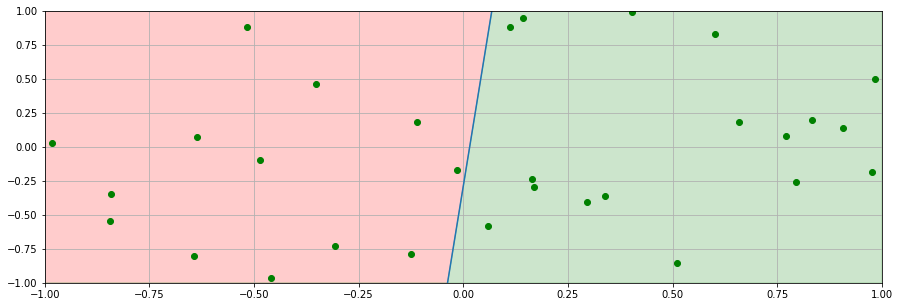

In [224]:
# Criando os dados que desenharão o plano e a reta
x = [-1,1]
y = [a0*x[0] + b0, a0*x[1] + b0]

# Criando o plano com a reta, separando os valores que serão mapeados para +1 ou -1
plt.figure(figsize=(15,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.plot(x, y)

# Criando os pontos x1, x2, x3, ...., xN
N = 10
X = []
for i in range (0, n):
    xi = [1, np.random.uniform(-1, 1, 1)[0], np.random.uniform(-1, 1, 1)[0]]
    X.append(xi)
Y = func(X, a0, b0)

x_values = [X[i][1] for i in range (0, len(X))]
y_values = [X[i][2] for i in range (0, len(X))]
plt.plot(x_values, y_values, 'go')

# Colorindo as áreas fora da linha
x_plot = [-1, 1]
y_plot = [a0*x_plot[0] + b0, a0*x_plot[1] + b0]
plt.fill_between(x_plot, [1,1], y_plot, color='r',alpha=.2)
plt.fill_between(x_plot, [-1,-1], y_plot, color='g',alpha=.2)

plt.show()

Meu objetivo é encontrar uma função h(x) que irá se aproximar da função f(x), então aplico o algoritmo do perceptron para esse problema e pegamos a reta hipótese fornecida pelos pesos $\vec{w}$ dados pelo perceptron.

In [225]:
# Inicializando pesos aleatórios
weights = np.random.uniform(0, 1, len(X[0]))

# Pegando os pesos fornecidos pelo Perceptron
w = perceptron(X, Y, weights)

Com os pesos em mãos, podemos plotar a reta, que é dada por $w_0x_0 + w_1x_1 + w_2x_2=0$, 

mas $x_0 = 1$, logo temos $w_0 + w_1x_1 + w_2x_2=0$

Isolando $x_2$ temos: $w_2x_2 = -w_1x_1 - w_0$

$x_2 = \frac{-w_1}{w_2}x_1 - \frac{w_0}{w_2}$

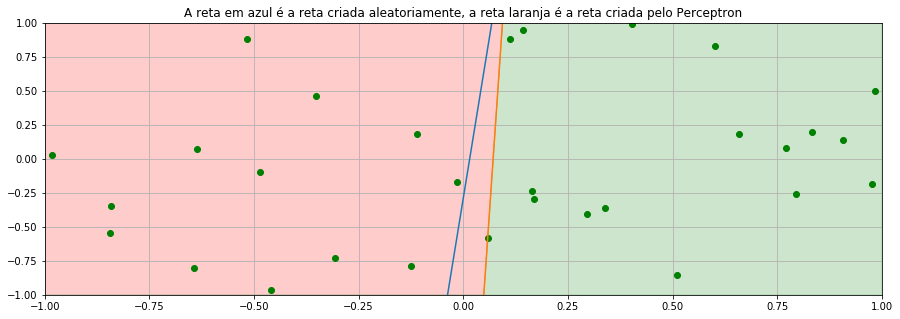

In [226]:
# Criando o plano com a reta, separando os valores que serão mapeados para +1 ou -1
x = [-1,1]
y = [a0*x[0] + b0, a0*x[1] + b0]

plt.figure(figsize=(15,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.plot(x, y)

plt.plot(x_values, y_values, 'go')

a = (-w[1]/w[2])
b = (-w[0]/w[2])
# Colorindo as áreas fora da linha
x_plot = [-1, 1]
y_plot = [a*x_plot[0] + b, a*x_plot[1] + b]
plt.plot(x_plot, y_plot)
plt.fill_between(x_plot, [1,1], y_plot, color='r',alpha=.2)
plt.fill_between(x_plot, [-1,-1], y_plot, color='g',alpha=.2)

plt.title('A reta em azul é a reta criada aleatoriamente, a reta laranja é a reta criada pelo Perceptron')
plt.show()

#### <center> Supondo o problema da porta OR </center>

$$\text{Seja o vetor } \vec{x_i}= [x_0, x_1, x_2] \text{ e o resultado da porta } y_i =  \pm 1$$

<center> O objetivo é achar os pesos que criam uma reta que separe todos os pontos usando o perceptron.</center>

| Inputs $x_1, x_2$|| Output y  |
|------------------||-----------|
|   (0,0) || -1|
|   (0,1)  || 1|
|   (1,0)  || 1|
|   (1,1)  || 1|


<center> Inicia-se com o peso $\vec{w} = [0.5, -1, 1]$</center>


In [227]:
# Setando os Inputs iniciais
x1 = [1, 0, 0]; 
x2 = [1, 1, 0]; 
x3 = [1, 0, 1]; 
x4 = [1, 1, 1]
x = [x1, x2, x3, x4]

# Setando meu output
y1 = -1; 
y2 = y3 = y4 = 1
y = [y1, y2, y3, y4]

# Iniciando meu peso
w = [0.5, -1, 1]

In [228]:
# Pega o pesos finais fornecidos pelo perceptron.
w = perceptron(x, y, w)

Com os pesos em mãos, podemos plotar a reta, como anteriormente, a equação é dada por

$$x_2 = \frac{-w_1}{w_2}x_1 - \frac{w_0}{w_2}$$

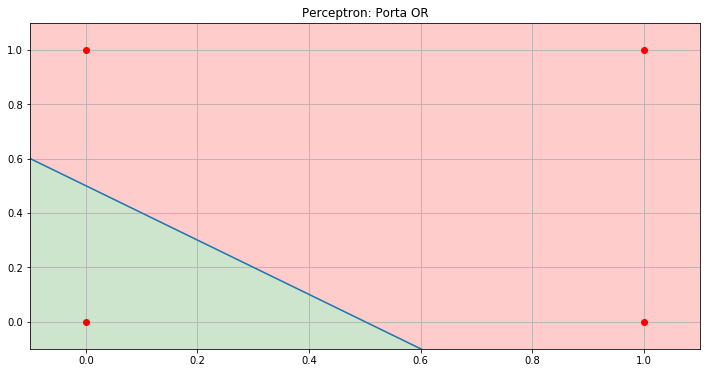

In [229]:
# Criando os dados que desenharão o plano e a reta
a, b = ((-w[1]/w[2]), (-w[0]/w[2]))
x = [-2,2]
y = [a*x[0] + b, a*x[1] + b]

# Criando o plano com a reta, separando os valores que serão mapeados para +1 ou -1
plt.figure(figsize=(12,6))
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.grid()
plt.plot(x, y)

plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'ro')

# Colorindo as áreas fora da linha
plt.fill_between(x, [2,2], y, color='r',alpha=.2)
plt.fill_between(x, [-2,-2], y, color='g',alpha=.2)
plt.title('Perceptron: Porta OR')

plt.show()